In [300]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.io as io

In [409]:
lambda_=0.336845458426966
radius=1
sigma=0.1
C0=0.8
B=2e+6

angles=np.array([0.5,  88.3, 185.1, 233. , 262.7])/360*2*np.pi
r0=radius*np.array([np.cos(angles),np.sin(angles)])
r0

array([[ 0.99996192,  0.02966624, -0.99604107, -0.60181502, -0.12706461],
       [ 0.00872654,  0.99955986, -0.0888943 , -0.79863551, -0.99189444]])

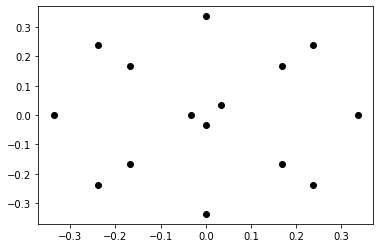

In [410]:
p=np.zeros([96,2])
for j,r in enumerate([0.05,0.07,0.09,0.11,0.13,0.15]):
    for i in range(16):
        alpha_i=i/16*np.pi*2
        p[i+j*16]=r*np.array([np.cos(alpha_i),np.sin(alpha_i)])
p=xyz
plt.plot(p[:,0],p[:,1],'ko')
plt.show()

In [411]:
p.shape,r0.shape

((15, 2), (2, 5))

In [412]:
Theta=20/360*2*np.pi
sigma=np.sqrt(2-2*np.cos(Theta))*radius
ampli=np.exp(-2*(np.pi**2)*(sigma**2)*(np.linalg.norm(p,axis=1)**2)).reshape((-1,1))
print(ampli.shape)
w=np.multiply(ampli,np.exp(-1j*2*np.pi*np.dot(p,r0)/(radius*lambda_)))
w=np.sum(w,axis=1)
w=w/np.sqrt(np.sum(abs(w)**2))
w.shape

(15, 1)


(15,)

In [413]:
N=10000
thetas=np.linspace(0,2*np.pi,N)
r=radius*np.array([np.cos(thetas),np.sin(thetas)])
r.shape

(2, 10000)

In [414]:
b_gain=abs((np.exp(1j*2*np.pi*np.dot(p,r)/(radius*lambda_))).T@w)
b_gain.shape

(10000,)

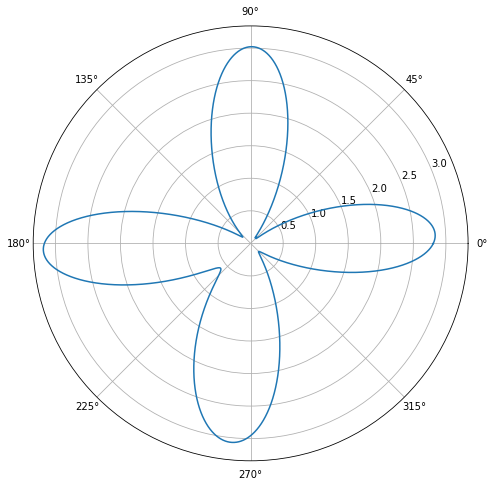

In [415]:
plt.figure(figsize=(10,8))
plt.polar()
plt.plot(np.arange(N)/N*2*np.pi,b_gain)
plt.show()

In [513]:
data=io.loadmat('./data/data.mat')
directions=data['directions']
xyz=data['xyz']
src=data['src_model']
directions.shape

(10, 5)

In [518]:
lambda_ = 0.336845458426966
C0 = 0.8
B = 2e6 
N=src.shape[0]
r=src[:,0:2].T
Theta=10/360*2*np.pi
sigma=np.sqrt(2-2*np.cos(Theta))
noise=0.1
r.shape,src.shape

((2, 121), (121, 3))

In [519]:
R_user = np.zeros((directions.shape[0],src.shape[0]))
R_user.shape

(10, 121)

In [521]:
gains=[]
for i in range(directions.shape[0]):
    angle=directions[i]/360*2*np.pi
    r0=np.array([np.cos(angle), np.sin(angle)])
    sigma=np.sqrt(2-2*np.cos(np.array([1,10,10,10,10])*2*np.pi/360))
    ampli=np.exp(-2*(np.pi**2)*np.dot((np.linalg.norm(xyz,axis=1)**2).reshape((-1,1)),(sigma**2).reshape((1,-1))))
    w=np.multiply(ampli,np.exp(-1j*2*np.pi*np.dot(xyz,r0)/(lambda_)))
    w=np.sum(w,axis=1)/w.shape[1]
    b_gain=abs((np.exp(1j*2*np.pi*np.dot(xyz,r)/(lambda_))).T@w)
    print(w.shape,b_gain.shape)
    for k in range(N):
        R_user[i,k]=B*np.log2(1+b_gain[i]/noise*C0)
R_aver=np.mean(R_user)/N
R_aver

(15,) (121,)
(15,) (121,)
(15,) (121,)
(15,) (121,)
(15,) (121,)
(15,) (121,)
(15,) (121,)
(15,) (121,)
(15,) (121,)
(15,) (121,)


97784.33377546733

In [525]:
N=10000
thetas=np.linspace(0,2*np.pi,N)
r=np.array([np.cos(thetas),np.sin(thetas)])
angle=directions[0]/360*2*np.pi
r0=np.array([np.cos(angle), np.sin(angle)])
sigma=np.sqrt(2-2*np.cos(np.array([1,20,20,20,20])*2*np.pi/360))
ampli=np.exp(-2*(np.pi**2)*np.dot((np.linalg.norm(xyz,axis=1)**2).reshape((-1,1)),(sigma**2).reshape((1,-1))))
print(ampli.shape)
w=np.multiply(ampli,np.exp(-1j*2*np.pi*np.dot(xyz,r0)/(lambda_)))
w=np.sum(w,axis=1)/w.shape[1]

b_gain=abs((np.exp(1j*2*np.pi*np.dot(xyz,r)/(lambda_))).T@w)
b_gain.shape

(15, 5)


(10000,)

In [526]:
angle/np.pi*180

array([  0.5,  88.3, 185.1, 233. , 262.7])

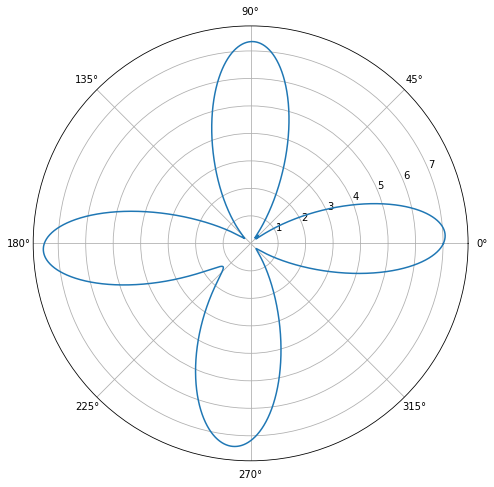

In [527]:
plt.figure(figsize=(10,8))
plt.polar()
plt.plot(np.arange(N)/N*2*np.pi,b_gain)
plt.show()